In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
missing_values = ["N/a","na",np.nan]

In [12]:
df_final2 = pd.read_csv("/Users/yaminipriyankakandikattu/Downloads/NCHS_-_Death_rates_and_life_expectancy_at_birth.csv",na_values = missing_values,thousands=',')

In [13]:
df_final2.head()

,Year,Race,Sex,Average Life Expectancy (Years),Age-adjusted Death Rate
0,1900,All Races,Both Sexes,47.3,2518.0
1,1901,All Races,Both Sexes,49.1,2473.1
2,1902,All Races,Both Sexes,51.5,2301.3
3,1903,All Races,Both Sexes,50.5,2379.0
4,1904,All Races,Both Sexes,47.6,2502.5


In [14]:
df_final2.isnull().sum()

Year                               0
Race                               0
Sex                                0
Average Life Expectancy (Years)    6
Age-adjusted Death Rate            0
dtype: int64

In [15]:
df_final2.dropna(axis=0)

,Year,Race,Sex,Average Life Expectancy (Years),Age-adjusted Death Rate
0,1900,All Races,Both Sexes,47.3,2518.0
1,1901,All Races,Both Sexes,49.1,2473.1
2,1902,All Races,Both Sexes,51.5,2301.3
3,1903,All Races,Both Sexes,50.5,2379.0
4,1904,All Races,Both Sexes,47.6,2502.5
...,...,...,...,...,...
1065,2013,White,Male,76.7,859.2
1066,2014,White,Male,76.7,853.4
1067,2015,White,Male,76.6,861.9
1068,2016,White,Male,76.4,858.9


In [20]:
# Extract the features and target variable
X = df_final2[['Year']]
y = df_final2['Age-adjusted Death Rate']

In [21]:
from sklearn.linear_model import LinearRegression, Ridge

Coefficent:  [-17.4841613]
Intercept:  35840.66241451145
Accuracy: 0.7970567032881153


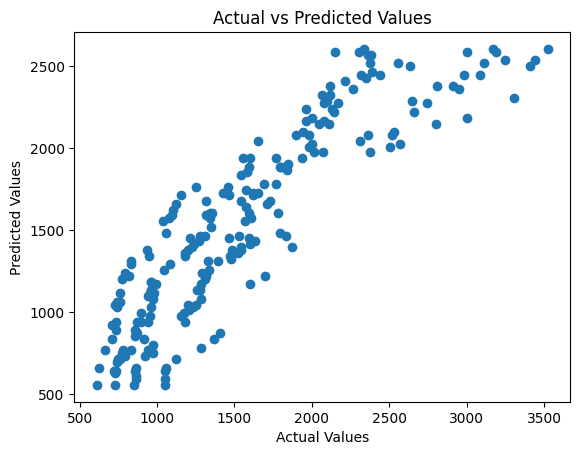

In [22]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression object
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Print the model coefficients
print("Coefficent: ", model.coef_)

# Print the model intercept
print("Intercept: ", model.intercept_)

# Predict the target variable for the testing set
y_pred = model.predict(X_test)

# Calculate the model accuracy on the testing set
accuracy = model.score(X_test, y_test)
print('Accuracy:', accuracy)

# Plot the actual vs predicted values for the testing set
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

In [25]:
# Create a new instance of the LinearRegression object
model = LinearRegression()

# Train the model on the entire dataset
model.fit(X, y)

# Define the feature values for the new house
death_rate = np.array([[2018]])

# Use the model to predict the price of the new house
predicted_rate = model.predict(death_rate)

# Print the predicted price
print("The predicted death rate in the year 2018 is", predicted_rate[0])

The predicted death rate in the year 2018 555.2494864612527


/Users/yaminipriyankakandikattu/opt/anaconda3/envs/python/lib/python3.9/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


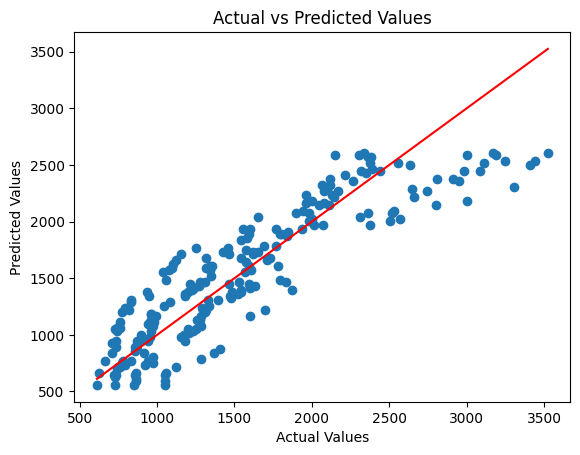

In [26]:
# Plot the actual vs predicted values for the testing set
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')

# Plot the regression line
x_range = np.linspace(y_test.min(), y_test.max(), 100)
y_range = x_range
plt.plot(x_range, y_range, color='r')

plt.show()

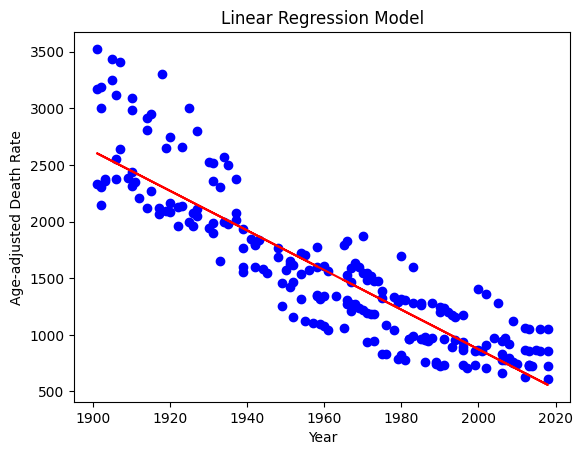

In [28]:
# Plot the scatter plot of the data
plt.scatter(X_test['Year'], y_test, color='blue')

# Plot the regression line
plt.plot(X_test['Year'], y_pred, color='red')

# Set the labels and title
plt.xlabel('Year')
plt.ylabel('Age-adjusted Death Rate')
plt.title('Linear Regression Model')

# Show the plot
plt.show()

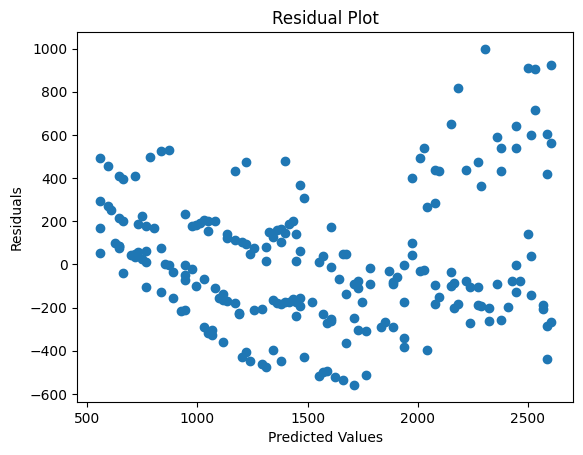

In [29]:
residuals = y_test - y_pred

# Plot the residuals
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()